<a href="https://colab.research.google.com/github/hnmelo/MujeresDigitales/blob/main/Taller_semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER 5
---
**Helenn Nicole Melo Valbuena**

Un fanático de pokemones le pide analizar los datos de pokemones, para esto se le proporciona un conjunto de datos en archivo csv. Este fanático le pide a usted como analista investigar cuales son los pokemones con mayor ataque.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [83]:
df = pd.read_csv('pokemon_data.csv')
df.head(1)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False


## Ejercicio 1:

Calcule el promedio y la mediana del ataque de: 
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

In [84]:
print('El promedio de ataque de todos los pokemones es: ',df['Attack'].mean()) #PROMEDIO TODOS 
print('La mediana de ataque de todos los pokemones es: ',df['Attack'].median()) #MEDIANA TODOS

El promedio de ataque de todos los pokemones es:  79.00125
La mediana de ataque de todos los pokemones es:  75.0


In [85]:
promlegend = df.groupby('Legendary').mean() 
medianlegend = df.groupby('Legendary').median()
print('El promedio de ataque de los pokemones: ',promlegend.Attack) #PROMEDIO DE TIPO LEGENDARY
print('La mediana de ataque de los pokemones: ',medianlegend.Attack) #MEDIANA DE TIPO LEGENDARY

El promedio de ataque de los pokemones:  Legendary
False     75.669388
True     116.676923
Name: Attack, dtype: float64
La mediana de ataque de los pokemones:  Legendary
False     72
True     110
Name: Attack, dtype: int64


In [86]:
promtype1 = df.groupby('Type 1').mean()
print('El promedio de ataque de los pokemones: ',promtype1.Attack) #PROMEDIO DE TIPO 1

El promedio de ataque de los pokemones:  Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64


In [87]:
mediantype1 = df.groupby('Type 1').median()
print('La mediana de ataque de los pokemones: ',mediantype1.Attack) #MEDIANA DE TIPO 1

La mediana de ataque de los pokemones:  Type 1
Bug          65.0
Dark         88.0
Dragon      113.5
Electric     65.0
Fairy        52.0
Fighting    100.0
Fire         84.5
Flying       85.0
Ghost        66.0
Grass        70.0
Ground       85.0
Ice          67.0
Normal       70.5
Poison       74.0
Psychic      57.0
Rock         95.0
Steel        89.0
Water        72.0
Name: Attack, dtype: float64


## Ejercicio 2:

Grafique el ataque de los pokemones con un grafico boxplot para los siguientes casos:
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

In [88]:
df.rename(columns={'Type 1' : 'Type_1','Type 2' : 'Type-2'}, inplace = True)

MEDIA:  79.00125
MEDIANA:  75.0


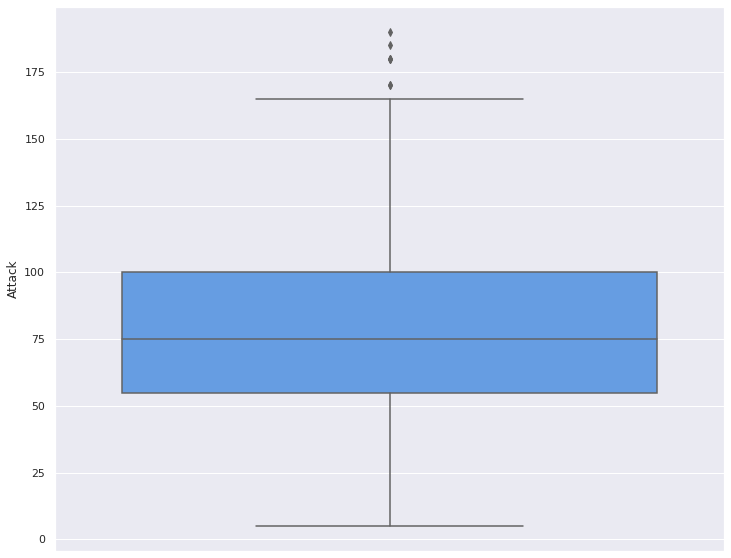

In [89]:
# POKEMONES POR ATTACK
import plotly.express as px
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,10)})
print('MEDIA: ',df.Attack.mean())
print('MEDIANA: ',df.Attack.median())
sns.boxplot( y = df.Attack, color= '#519AF7' )

PROMEDIO:  116.67692307692307
MEDIANA:  110.0


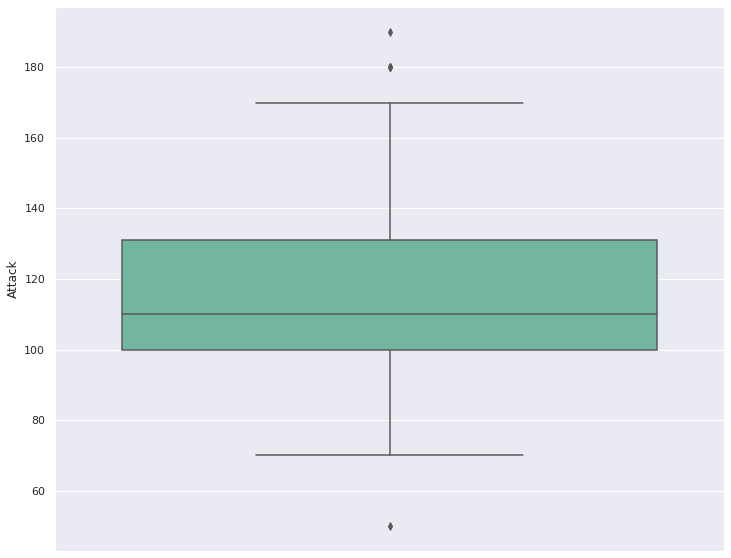

In [90]:
# POKEMONES LEGENDARIOS
import plotly.express as px
legends = df.Attack[df.Legendary == True]
print('PROMEDIO: ',legends.mean())
print('MEDIANA: ',legends.median())
sns.boxplot(y=legends, palette='Set2')

PROMEDIO:  75.66938775510204
MEDIANA:  72.0


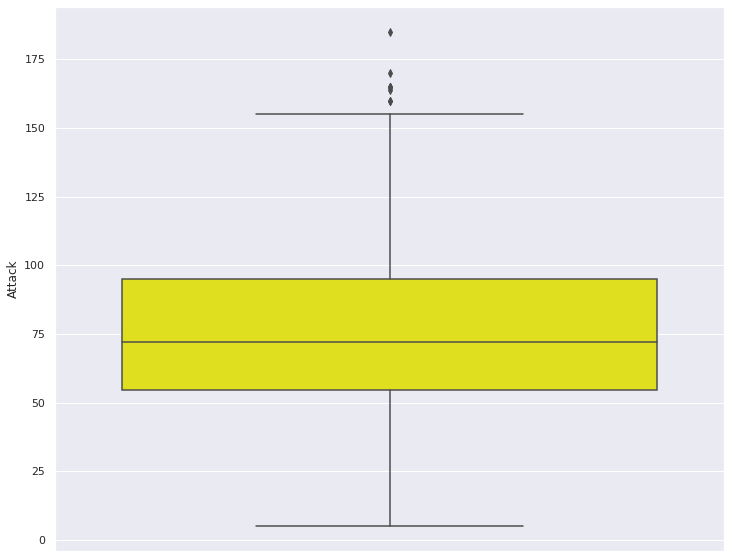

In [91]:
# POKEMONES NO LEGENDARIOS
import plotly.express as px
nolegends = df.Attack[df.Legendary == False]
print('PROMEDIO: ',nolegends.mean())
print('MEDIANA: ',nolegends.median())
sns.boxplot(y = nolegends, color = 'yellow')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

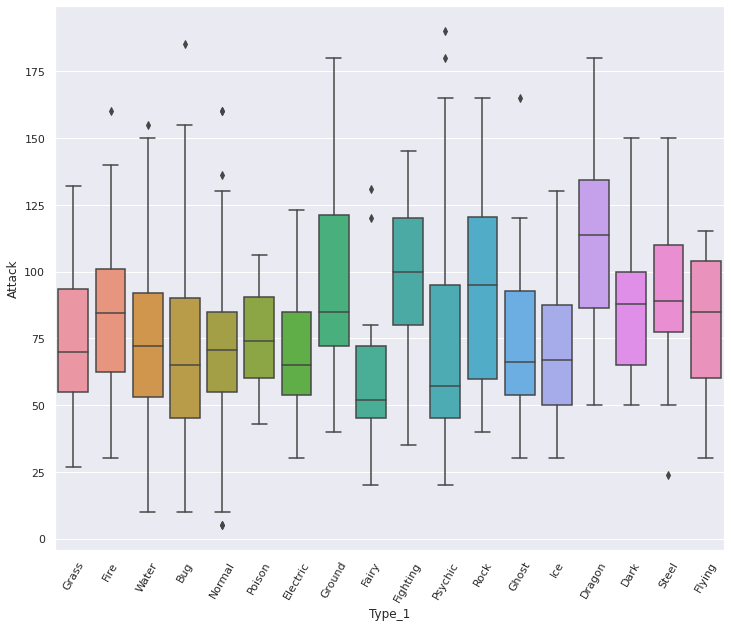

In [92]:
# POKEMONES POR TIPO 1
sns.boxplot(x = df.Type_1, y = df.Attack)
plt.xticks(rotation = 60)

In [93]:
print('PROMEDIOS de pokemones según:',df['Attack'].groupby(df['Type_1']).mean())

PROMEDIOS de pokemones según: Type_1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64


In [94]:
print('MEDIANA de pokemones según:',df['Attack'].groupby(df['Type_1']).median())

MEDIANA de pokemones según: Type_1
Bug          65.0
Dark         88.0
Dragon      113.5
Electric     65.0
Fairy        52.0
Fighting    100.0
Fire         84.5
Flying       85.0
Ghost        66.0
Grass        70.0
Ground       85.0
Ice          67.0
Normal       70.5
Poison       74.0
Psychic      57.0
Rock         95.0
Steel        89.0
Water        72.0
Name: Attack, dtype: float64


## Ejercicio 3:

Realice las siguientes pruebas de hipótesis:
1. El promedio del ataque de los pokemones es mayor a 77
2. El promedio del ataque de los pokemones legendarios es diferente a los no legendarios


Y determine con un nivel de significancia del 5% (es decir $\alpha$ = 0.05), si podemos rechazar o no las 3 hipótesis anteriores. 

In [96]:
df['Attack'].mean()

79.00125

In [99]:
stats.ttest_1samp(df['Attack'], popmean=79.00125)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
pvalue = 1.0
alpha = 0.05

if pvalue 